<a id='top'></a>

# EXTRACTION OF MODEL DATABASES
### Created by Pablo Garcia del Real (Laboratoire de Géologie de Lyon)

This notebook extracts data from the dabases that contain the following parameters:

Parameter, unit, notation

Ocean crustal thickness (gravity), km, OCTG	
Ocean crustal thickness (seismic), km, OCTS	 
Areal proportion of ultramafic rocks, %, A	
Magmatic component in mid-ocean ridges,%,MAG	
Iron (FeO) content in ultramafic rocks, wt. %,FEO_TOTAL	 
Degree of serpentinization,%, DS


**Importing libraries**


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas
import math
import random as rm
print 'pandas imported'
print 'numpy imported'
print 'matplotlib imported--YOU CAN MAKE PLOTS!'
print "random imported, you can do montecarlo"
%matplotlib inline

pandas imported
numpy imported
matplotlib imported--YOU CAN MAKE PLOTS!
random imported, you can do montecarlo


## EXTRACTION OF CRUSTAL THICKNESS DATA



In [3]:
#This section extracts data from database CrustalThickness.csv

crustal_thickness = pandas.read_csv('CrustalThickness.csv', sep=',')
print 'cvs file imported'
print "total number of rows is:", len(crustal_thickness)
crustal_thickness.head()



cvs file imported
total number of rows is: 45


,RIDGE,PROFILE,OCTS,OCTG,REFERENCE
0,Gakkel,Western Volcanic Zone,3.2,NaN,Jokat et Schmidt-Aursch 2007
1,Gakkel,Western Volcanic Zone,1.2,NaN,Jokat et Schmidt-Aursch 2007
2,Gakkel,Western Volcanic Zone,4.9,NaN,Jokat et Schmidt-Aursch 2007
3,Gakkel,Western Volcanic Zone,2.5,NaN,Jokat et Schmidt-Aursch 2007
4,Gakkel,Sparsely Magmatic Zone,2.5,NaN,Jokat et Schmidt-Aursch 2007


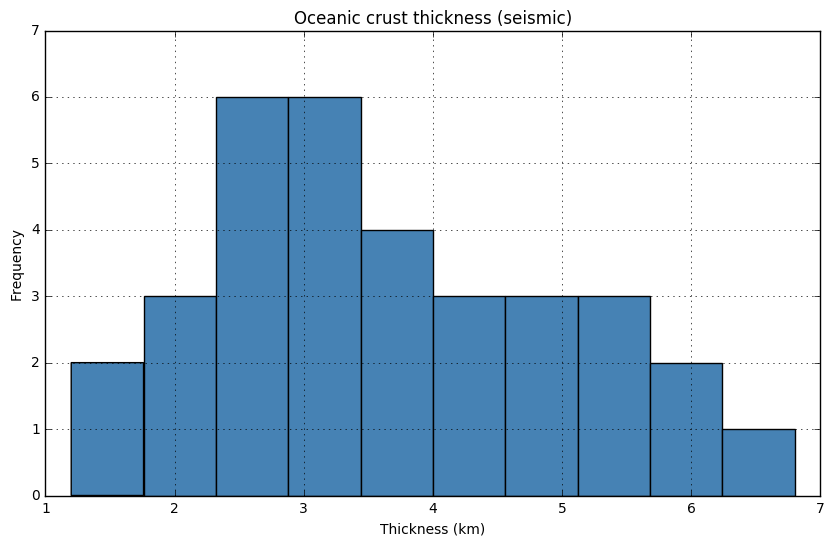

In [71]:
crustal_thickness.OCTS.hist(bins=10, color='#4682b4',figsize=(10,6))
plt.xlim([1,7])
plt.ylim([0,7])
plt.title("Oceanic crust thickness (seismic)")
plt.xlabel("Thickness (km)")
plt.ylabel("Frequency")

plt.show()

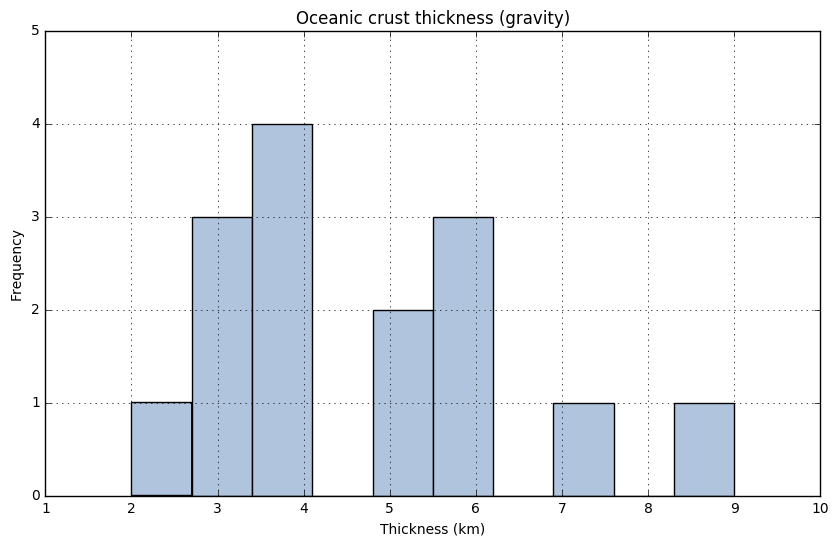

In [72]:
crustal_thickness.OCTG.hist(bins=10, color='#b0c4de',figsize=(10,6))
plt.xlim([1,10])
plt.ylim([0,5])
plt.title("Oceanic crust thickness (gravity)")
plt.xlabel("Thickness (km)")
plt.ylabel("Frequency")

plt.show()

## EXTRACTION OF AREAL PROPORTION (A) OF ULTRAMAFIC ROCKS

In [49]:
#This section extracts data from database ArealProportion.csv

areal_proportion = pandas.read_csv('ArealProportion.csv', sep=',')
print 'cvs file imported'
print "total number of rows is:", len(areal_proportion)
areal_proportion.head()



cvs file imported
total number of rows is: 9


,RIDGE,PROFILE,A,REFERENCE
0,MAR,15�N and 40�N,15.0,"Cannat et al., 2010 with data from Thibaud et ..."
1,MAR,15�N and 40�N,30.0,"Cannat et al., 2010 with data from Thibaud et ..."
2,MAR,21o50' to 23o40'N,23.0,"Cannat et al., 2010; Cannat et al., 1995"
3,MAR,15o20'N to 16o20'N,40.0,"Cannat et al., 1997 cited in Cannat et al., 2010"
4,MAR,12o50'N to 15o10'N,50.0,"Assumed percentage, based on Cannat et al., 20..."


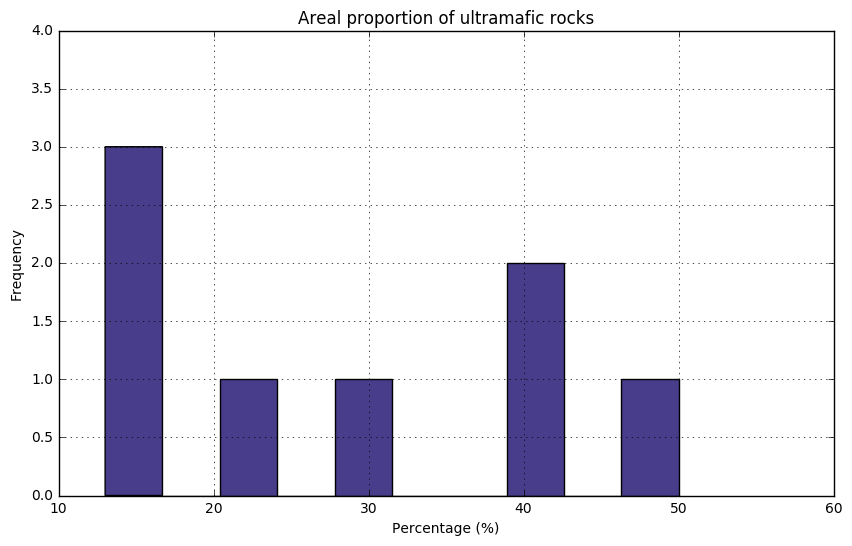

In [73]:
areal_proportion.A.hist(bins=10, color='#483d8b',figsize=(10,6))
plt.xlim([10,60])
plt.ylim([0,4])
plt.title("Areal proportion of ultramafic rocks")
plt.xlabel("Percentage (%)")
plt.ylabel("Frequency")

plt.show()

## EXTRACTION OF MAGMATIC PROPORTION (MAG) OF ULTRAMAFIC ROCKS

In [55]:
#This section extracts data from database Magmatic.csv

magmatic = pandas.read_csv('Magmatic.csv', sep=',')
print 'cvs file imported'
print "total number of rows is:", len(magmatic)
magmatic.head()


cvs file imported
total number of rows is: 27


,RIDGE,PROFILE,MAG,REFERENCE
0,MAR,15oN,35.0,"Cannat et al., 2004 and Cannat et al., 2010"
1,MAR,23oN,35.0,"Cannat et al., 2004 and Cannat et al., 2010"
2,SWIR,61o-69oN,10.0,"Cannat et al., 2004 and Cannat et al., 2010"
3,MAR,23o15'-23o40'N,60.0,"Dick et al., 2008 in Cannat et al., 2010"
4,MAR,Ararat and Babel Domes,77.9,"Dick et al., 2008 (Fig. 3A)"


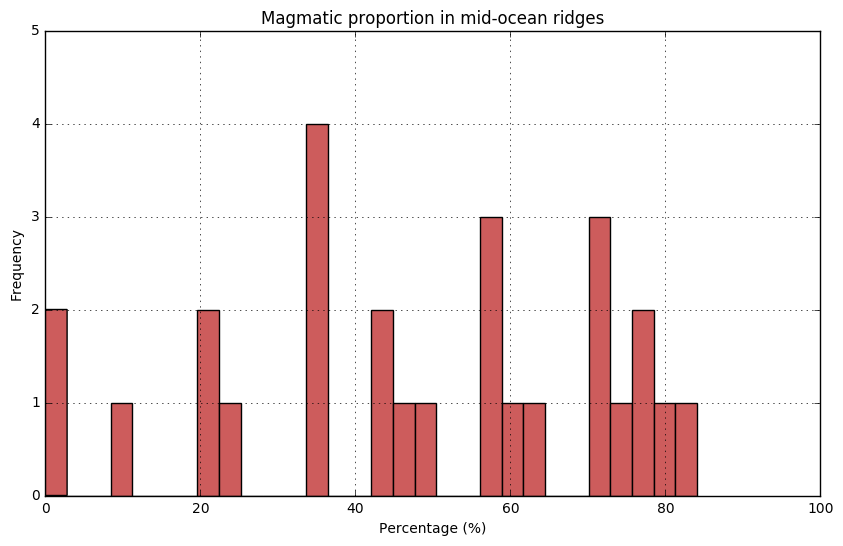

In [74]:
magmatic.MAG.hist(bins=30, color='#cd5c5c',figsize=(10,6))
plt.xlim([0,100])
plt.ylim([0,5])
plt.title("Magmatic proportion in mid-ocean ridges")
plt.xlabel("Percentage (%)")
plt.ylabel("Frequency")

plt.show()

## EXTRACTION OF GLOBAL IRON CONTENT (FEO) FROM EARTHCHEM DATABASES


** Table of Contents: **
* <a href='#Part 1'> Loading databases (csv files) </a>
    

<a id='Part 1'></a> 
## Part 1: Loading databases | Iron

This notebook extracts FeO and Fe2O3 content from worldwide database of ultramafic rocks from mid-ocean ridge in all ocean basins.

Current data were retrieved March 2017 from earthchem.org using the search criteria:

igneous > plutonic > ultramafic > dunite,igneous > plutonic > ultramafic > clinopyroxenite,igneous > plutonic > ultramafic > harzburgite,igneous > plutonic > ultramafic > lherzolite,igneous > plutonic > ultramafic > orthopyroxenite,igneous > plutonic > ultramafic > peridotite,igneous > plutonic > ultramafic > websterite,igneous > plutonic > ultramafic > wehrlite,igneous > ultramafic,igneous > plutonic > ultramafic > pyroxenite,igneous > plutonic > ultramafic > chromitite,igneous > plutonic > ultramafic





**Importing csv file**

Database used: EarthChem data modified with additional data from 

Dynamic control on serpentine crystallization in veins: Constraints on hydration processes in oceanic peridotites		Andreani, Mével, Boullier, Escartín

Serpentinization and fluid pathways in tectonically exhumed peridotites from the southwest Indian ridge (62-65°E)		Rouméjon, S., Cannat, M., Agrinier, P., Godard, M., & Andreani, M. (2015). 

Abyssal peridotites, very slow spreading ridges and ocean ridge magmatism		Dick, H.J.B

Petrologic and stable isotope constraints on hydrothermal alteration and serpentinization of the EPR shallow mantle at Hess Deep (site 895)		Früh-Green, G.L; Plas, A.; Lécuyer, C. 

Petrology of mantle-derived ultramafics from the Owen Fracture Zone, northwest Indian Ocean: implications for the nature of the oceanic upper mantle		Hamlyn, P.; Bonattie, E. 


In [5]:
#File should only contain columns and lines from the earthchem.org
#Example file can be found under the name [INSERT NAME] 

peridotite_composition = pandas.read_csv('MOR_CHEM_DATASET_MODEL.csv', sep=',')
print 'cvs file imported'

cvs file imported


**Activate only if you want to visualize what you have uploaded (it will only show the first 5 lines and all the columns)**


In [4]:
print "total number of rows is:", len(peridotite_composition)

total number of rows is: 2660


In [5]:
peridotite_composition.head()

,OCEAN,SAMPLEID,LATITUDE,LONGITUDE,SIO2,TIO2,AL2O3,FE2O3,FE2O3T,FEO,FEOT,FEO_TOTAL,MGO,CAO,NA2O,K2O,P2O5,MNO
0,Atlantic,ISL1176-058-034,-54.07,6.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Atlantic,ISL1176-058-034,-54.07,6.40,46.22,0.04,2.42,NaN,NaN,NaN,8.61,8.61,40.25,2.23,0.08,0.01,0.03,0.11
2,Atlantic,MELVULC-5-037-003,-58.43,-15.66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Atlantic,MELVULC-5-037-003,-58.43,-15.66,46.12,0.04,1.85,NaN,NaN,NaN,9.25,9.25,41.63,0.92,0.08,0.01,0.01,0.09
4,Atlantic,PIL7002-023-A,10.70,-41.63,38.73,0.08,1.81,7.49,NaN,1.35,NaN,8.09,35.87,1.34,0.18,0.02,0.05,0.16


# Visualisation of Input Chemical Data

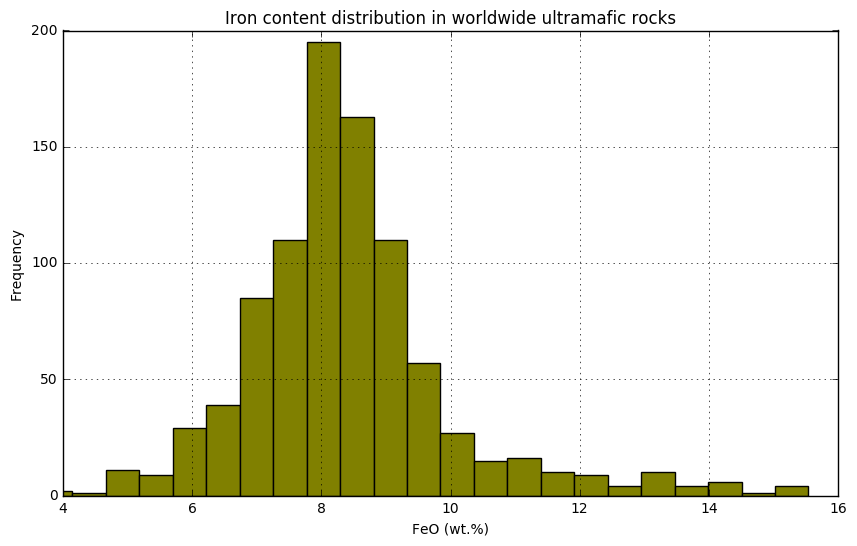

In [6]:
peridotite_composition.FEO_TOTAL.hist(bins=30, color='olive',figsize=(10,6))
plt.xlim([4,16])
plt.ylim([0,200])
plt.title("Iron content distribution in worldwide ultramafic rocks")
plt.xlabel("FeO (wt.%)")
plt.ylabel("Frequency")


plt.show()


In [12]:
peridotite_composition.dtypes

OCEAN         object
SAMPLEID      object
LATITUDE     float64
LONGITUDE    float64
SIO2         float64
TIO2         float64
AL2O3        float64
FE2O3        float64
FE2O3T       float64
FEO          float64
FEOT         float64
FEO_TOTAL    float64
MGO          float64
CAO          float64
NA2O         float64
K2O          float64
P2O5         float64
MNO          float64
dtype: object

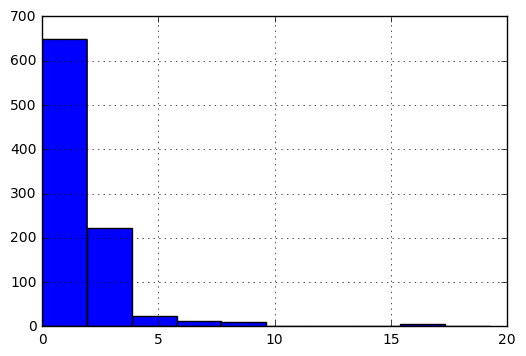

In [10]:
peridotite_composition.AL2O3.hist()


## PLOTTING IRON CONTENT

Converting columns into arrays

In [13]:
#This repairs the dataset to remove all the NAN or empty values
FEOFIXED = [value for value in FEO if not math.isnan(value)]


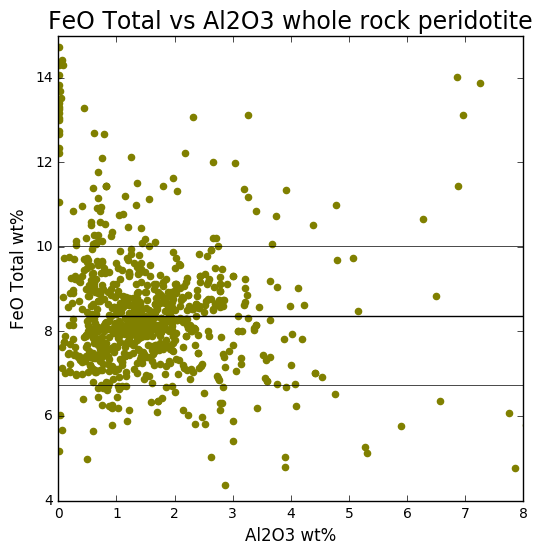

In [14]:
#hardcodes and transforms all the row names into lists. Name of row is derived from standard EarthChem.org download files 
plt.figure(figsize=(6,6))
FEO= list(peridotite_composition.FEO_TOTAL)
AL= list((peridotite_composition.AL2O3))
plt.title('FeO Total vs Al2O3 whole rock peridotite',fontsize=17)
plt.scatter(AL,FEO, color='olive')
plt.xlabel('Al2O3 wt%',fontsize=12)
plt.ylabel('FeO Total wt%',fontsize=12)
axes = plt.gca()
axes.set_xlim([0,8])
axes.set_ylim([4,15])
plt.plot([0, 8], [np.average(FEOFIXED), np.average(FEOFIXED)], 'k-', lw=1)
plt.plot([0, 8], [np.std(FEOFIXED)+np.average(FEOFIXED), np.average(FEOFIXED)+np.std(FEOFIXED)], 'k-', lw=0.5)
plt.plot([0, 8], [np.average(FEOFIXED)-np.std(FEOFIXED), np.average(FEOFIXED)-np.std(FEOFIXED)], 'k-', lw=0.5)

#plt.savefig('FeOvsAl2O3.svg',transparent=True)


In [15]:
np.average(FEOFIXED)
#np.std(FEOFIXED)

8.3761739130434787

In [48]:
#creates a Monte Carlo simulation to determine the average of a given composition
# from http://stackoverflow.com/questions/21203960/calculating-mean-of-sample-in-monte-carlo-simulation

FEOmean = np.cumsum(FEOFIXED)
FEOmean = FEOmean/np.array(range(1,len(FEOFIXED)+1))
print FEOmean

[ 8.61        8.93        8.65        8.2675      8.054       8.215
  8.25285714  8.29875     8.45444444  8.391       8.44818182  8.46
  8.49230769  8.49928571  8.74066667  8.76375     8.73        8.74666667
  8.76210526  8.7625      8.75333333  8.73636364  8.73695652  8.76791667
  8.7572      8.75153846  8.70222222  8.66714286  8.65275862  8.64166667
  8.60806452  8.625625    8.61939394  8.60676471  8.79371429  8.65555556
  8.57405405  8.34842105  8.24641026  8.3085      8.33756098  8.34928571
  8.33953488  8.30568182  8.298       8.34934783  8.38340426  8.42229167
  8.44142857  8.439       8.42294118  8.42673077  8.42773585  8.42111111
  8.416       8.41017857  8.39614035  8.40862069  8.37915254  8.361
  8.33229508  8.30725806  8.28793651  8.30375     8.284       8.26484848
  8.27283582  8.27088235  8.26898551  8.25785714  8.24704225  8.24444444
  8.28739726  8.32918919  8.33626667  8.33486842  8.35311688  8.34730769
  8.34139241  8.34875     8.35567901  8.37841463  8.38228916  8.394

In [49]:
np.average(FEOmean)


8.4259850138194405

In [19]:
A = (2,3,4)
B = (.1,.2,.3)
C = (10,20,30)

from random import *
from math import *
def monte_carlo(n):
    c=0
    for k in range(n):
        if random()**2+random()**2<=1:
            c=c+1
        return c/n

In [20]:
import numpy as np
def MonteCarlo_double(f, g, x0, x1, y0, y1, n):
    """
    Monte Carlo integration of f over a domain g>=0, embedded
    in a rectangle [x0,x1]x[y0,y1]. n^2 is the number of
    random points.
    """
    # Draw n**2 random points in the rectangle
    x = np.random.uniform(x0, x1, n)
    y = np.random.uniform(y0, y1, n)
    # Compute sum of f values inside the integration domain
    f_mean = 0
    num_inside = 0   # number of x,y points inside domain (g>=0)
    for i in range(len(x)):
        for j in range(len(y)):
            if g(x[i], y[j]) >= 0:
                num_inside += 1
                f_mean += f(x[i], y[j])
    f_mean = f_mean/float(num_inside)
    area = num_inside/float(n**2)*(x1 - x0)*(y1 - y0)
    return area*f_mean
print 

In [27]:
# E =(1-m)ct*A/mgct
#Array configuration is Mid-Ocean Ridges Segments 23N MAR; 15o20-16o20 MAR; 61-66E SWIR 

n = np.array([0.35,0.35,0.10])
seis_ct = np.array([6.8, 5.4, 3.5])
A = np.array([0.23,0.40,0.41])
grav_ct = np.array([4,4,3])
E = ((1-n)*grav_ct*A)/seis_ct
print E

[ 0.08794118  0.19259259  0.31628571]


[ 0.1   0.35  0.35]


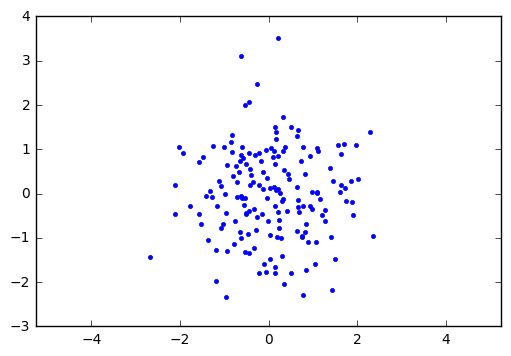

In [76]:
x, y = [], []
for i in range(170):
    a, b = rm.gauss(0.0, 1.0), rm.gauss(0.0, 1.0)
    x.append(a)
    y.append(b)
plt.plot(x, y, '.')
plt.axis('equal')
plt.show()

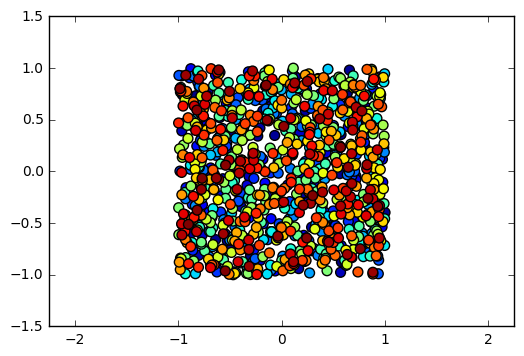

In [21]:
#http://python-prepa.github.io/stochastique.html
x, y = [], []
for i in range(1000):
    a, b = rm.uniform(-1.,1.), rm.uniform(-1.,1.)
    x.append(a)
    y.append(b)
xyc = range( len( x ) )
plt.scatter(x,y,c = xyc, marker = '.', s=200)
plt.axis('equal')
plt.show()

In [49]:
rm.choice(n)

0.34999999999999998

In [5]:
ultraslow = pandas.read_csv('ultraslow.csv', sep=',')
print 'cvs file imported'
print "total number of rows is:", len(ultraslow)
ultraslow.head()

 cvs file imported
total number of rows is: 231


,Time,Length_Ultraslow
0,0,22506.0
1,1,21780.4
2,2,19310.6
3,3,18061.8
4,4,16749.5


Enter an x value: 12
248834


ValueError: operands could not be broadcast together with shapes (3,) (4,) 